<a href="https://colab.research.google.com/github/Jayyanth-21/COE/blob/master/Temp_by_city.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [32]:
df=pd.read_csv(r"/content/GlobalLandTemperaturesByCity.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [6]:
df


dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0       1743-11-01               6.068                          1.737  Århus   
1       1743-12-01                 NaN                            NaN  Århus   
2       1744-01-01                 NaN                            NaN  Århus   
3       1744-02-01                 NaN                            NaN  Århus   
4       1744-03-01                 NaN                            NaN  Århus   
...            ...                 ...                            ...    ...   
428657  1882-06-01              18.964                          0.777  Asaka   
428658  1882-07-01              23.300                          0.664  Asaka   
428659  1882-08-01              24.106                          0.637  Asaka   
428660  1882-09-01              20.052                          0.430  Asaka   
428661  1882-10-01              14.189                          0.755  Asaka   

        Country Latitude Longitude  
0       Denmark   57.05N    10.33E  
1       Denmark   57.05N    10.33E  
2       Denmark   57.05N    10.33E  
3       Denmark   57.05N    10.33E  
4       Denmark   57.05N    10.33E  
...         ...      ...       ...  
428657    Japan   36.17N   139.23E  
428658    Japan   36.17N   139.23E  
428659    Japan   36.17N   139.23E  
428660    Japan   36.17N   139.23E  
428661        J      NaN       NaN  

[428662 rows x 7 columns]

In [7]:
len(df['City'].unique())

171

In [8]:
plt.rcParams['agg.path.chunksize']=100000


Text(0, 0.5, 'Avg temp')

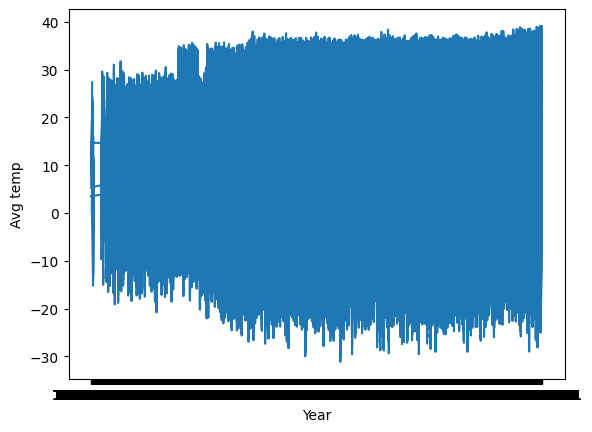

In [9]:
plt.plot(df['dt'],df['AverageTemperature'])
plt.xlabel('Year')
plt.ylabel('Avg temp')

In [11]:
df['AverageTemperature']=df['AverageTemperature'].fillna(df['AverageTemperature'].mean())

In [12]:
df

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0       1743-11-01            6.068000                          1.737  Århus   
1       1743-12-01           16.565932                            NaN  Århus   
2       1744-01-01           16.565932                            NaN  Århus   
3       1744-02-01           16.565932                            NaN  Århus   
4       1744-03-01           16.565932                            NaN  Århus   
...            ...                 ...                            ...    ...   
428657  1882-06-01           18.964000                          0.777  Asaka   
428658  1882-07-01           23.300000                          0.664  Asaka   
428659  1882-08-01           24.106000                          0.637  Asaka   
428660  1882-09-01           20.052000                          0.430  Asaka   
428661  1882-10-01           14.189000                          0.755  Asaka   

        Country Latitude Longitude  
0       Denmark   57.05N    10.33E  
1       Denmark   57.05N    10.33E  
2       Denmark   57.05N    10.33E  
3       Denmark   57.05N    10.33E  
4       Denmark   57.05N    10.33E  
...         ...      ...       ...  
428657    Japan   36.17N   139.23E  
428658    Japan   36.17N   139.23E  
428659    Japan   36.17N   139.23E  
428660    Japan   36.17N   139.23E  
428661        J      NaN       NaN  

[428662 rows x 7 columns]

In [13]:
df=df.drop_duplicates()

In [38]:
df['dt']=pd.to_datetime(df['dt'],format="%Y-%m-%d")

In [39]:
df['Year']=df['dt'].dt.year

In [40]:
y=df.groupby('Year')['AverageTemperature'].mean()

In [41]:
nycity=df[df['City']=='New York']
nycity['Year']=df[df['City']=='New York']['dt'].dt.year

<ipython-input-41-1573491128bd>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
y

Year
1743    11.250740
1744    13.082295
1745    11.958866
1746    16.565932
1747    16.565932
          ...    
2009    18.347889
2010    18.342003
2011    18.150016
2012    18.236676
2013    18.599271
Name: AverageTemperature, Length: 271, dtype: float64

In [19]:
df['Year']

0         1743
1         1743
2         1744
3         1744
4         1744
          ... 
428657    1882
428658    1882
428659    1882
428660    1882
428661    1882
Name: Year, Length: 428662, dtype: int32

Text(0, 0.5, 'Average temp')

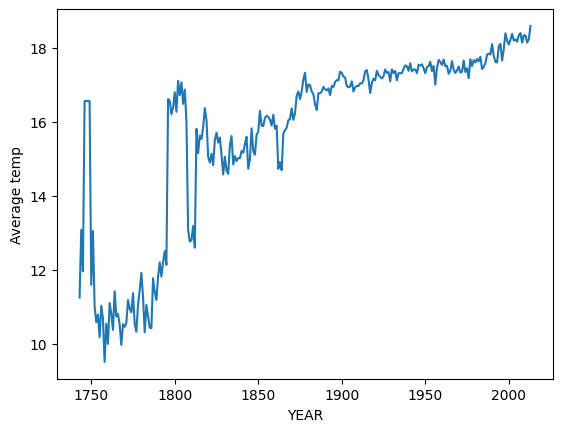

In [21]:
plt.plot(df['Year'].unique(),y)
plt.xlabel('YEAR')
plt.ylabel('Average temp')

In [29]:
country_avg_temp=df.groupby('Country')['AverageTemperature'].mean().reset_index()

topct=country_avg_temp.sort_values(by='AverageTemperature',ascending=False).head(10)
topct

Country  AverageTemperature
35           Philippines           26.428814
28              Malaysia           26.262555
3                  Benin           25.962953
50             Venezuela           25.831360
46  United Arab Emirates           25.830355
32               Nigeria           25.547217
10         Côte D'Ivoire           25.543243
51                 Yemen           25.504318
5                  Burma           25.438479
14           El Salvador           25.343392

<BarContainer object of 10 artists>

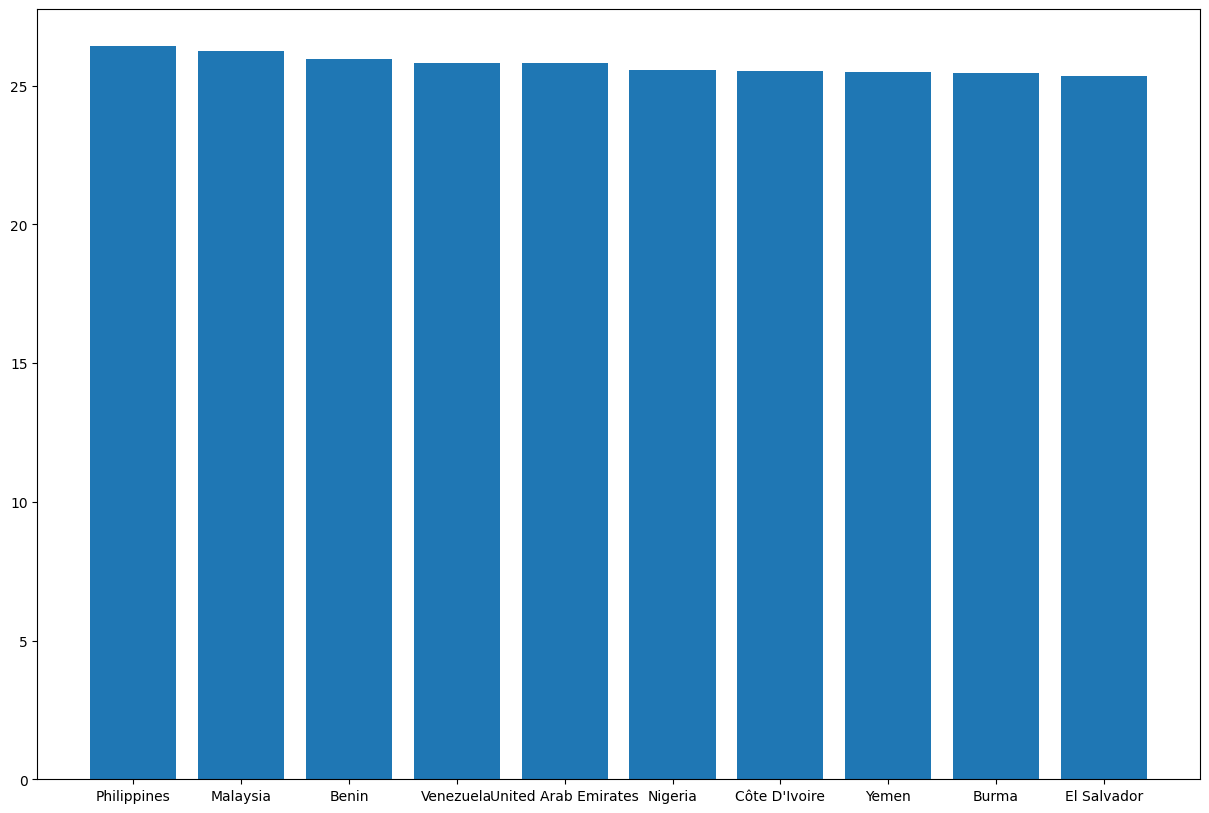

In [23]:
plt.figure(figsize=(15,10))
plt.bar(topct['Country'],topct['AverageTemperature'])

(array([1.0000e+00, 2.0000e+00, 7.0000e+00, 9.0000e+00, 1.0000e+01,
        1.2000e+01, 2.7000e+01, 3.7000e+01, 4.8000e+01, 7.4000e+01,
        9.6000e+01, 1.0800e+02, 1.6000e+02, 2.1500e+02, 2.5000e+02,
        2.8000e+02, 3.1600e+02, 3.9800e+02, 4.2100e+02, 4.3500e+02,
        4.9500e+02, 4.9500e+02, 5.2000e+02, 5.4000e+02, 5.3000e+02,
        5.6600e+02, 6.1400e+02, 6.3500e+02, 7.1500e+02, 7.6600e+02,
        7.9200e+02, 9.0700e+02, 9.3200e+02, 9.7000e+02, 1.0300e+03,
        1.0470e+03, 1.1550e+03, 1.2540e+03, 1.4480e+03, 1.5720e+03,
        1.8160e+03, 2.0460e+03, 2.2380e+03, 2.7830e+03, 3.1220e+03,
        3.5680e+03, 4.0920e+03, 4.5590e+03, 5.2300e+03, 5.3930e+03,
        5.7340e+03, 5.7310e+03, 5.6140e+03, 5.4190e+03, 5.3910e+03,
        5.2640e+03, 5.4850e+03, 5.8310e+03, 6.1510e+03, 6.5890e+03,
        6.7570e+03, 6.9710e+03, 7.5550e+03, 7.9100e+03, 8.3430e+03,
        8.7460e+03, 9.1820e+03, 2.7595e+04, 1.0451e+04, 1.0011e+04,
        9.8330e+03, 1.0285e+04, 1.0239e+04, 1.04

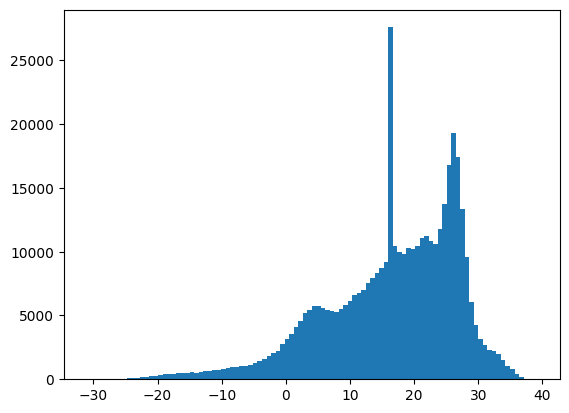

In [24]:
plt.hist(df['AverageTemperature'],bins=100)

In [25]:
px.scatter(df['AverageTemperature'],df['AverageTemperatureUncertainty'])

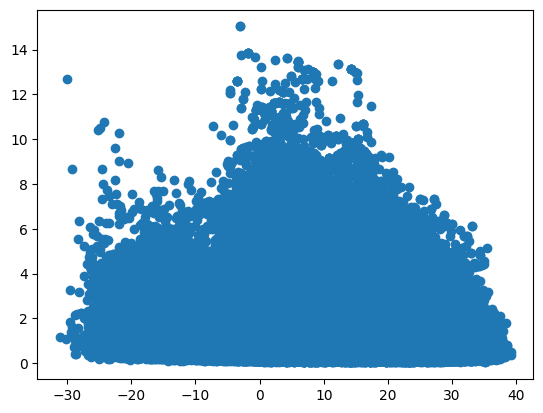

In [26]:
plt.scatter(df['AverageTemperature'],df['AverageTemperatureUncertainty'])

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

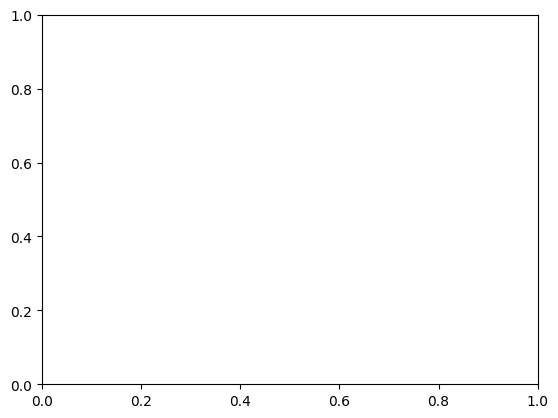

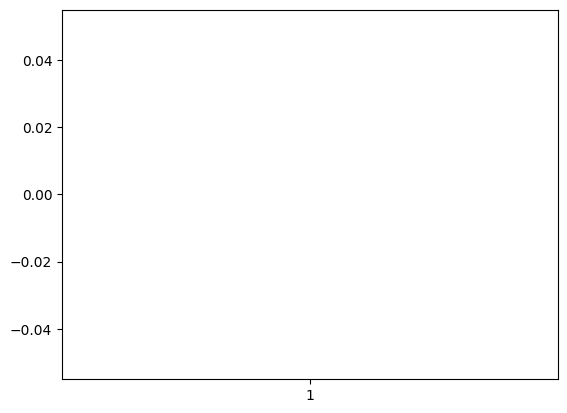

In [44]:
plt.boxplot(nycity.groupby('Year')['AverageTemperature'].mean())
plt.show()



<Axes: ylabel='AverageTemperature'>

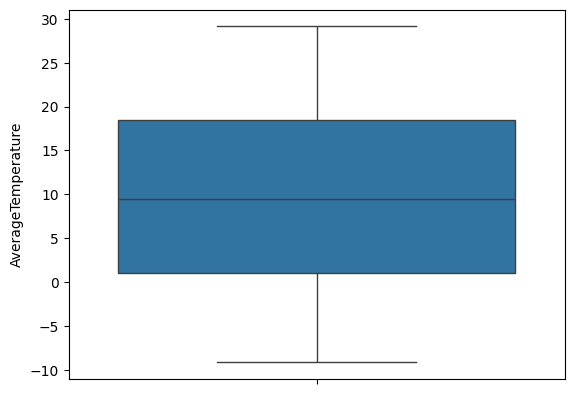

In [45]:

import seaborn as sns
sns.boxplot(nycity['AverageTemperature'])


In [46]:

tips = sns.load_dataset('tips')



<Axes: xlabel='total_bill', ylabel='Count'>

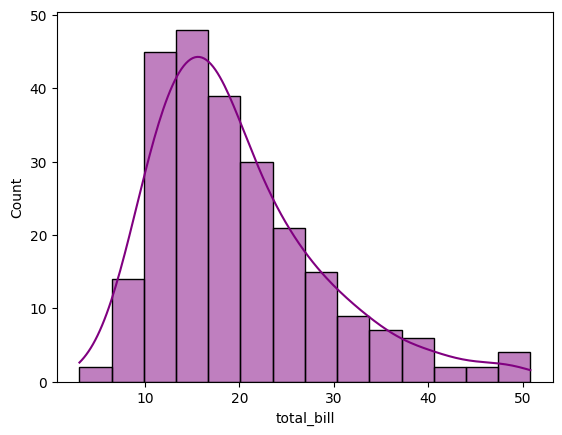

In [47]:

sns.histplot(data=tips,x='total_bill',kde=True,color='purple')



<Axes: xlabel='total_bill', ylabel='Density'>

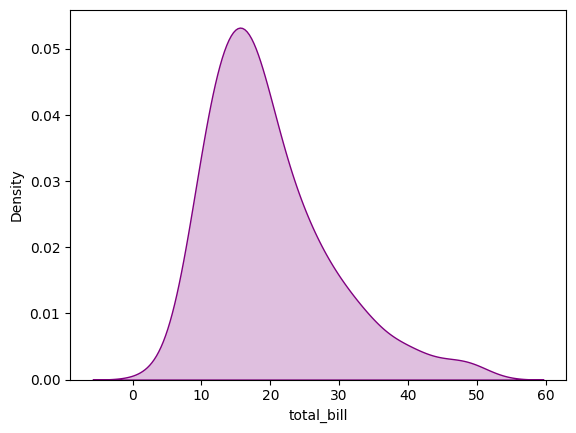

In [48]:

sns.kdeplot(data=tips,x='total_bill',color='purple',fill=True)


<Axes: xlabel='day', ylabel='total_bill'>

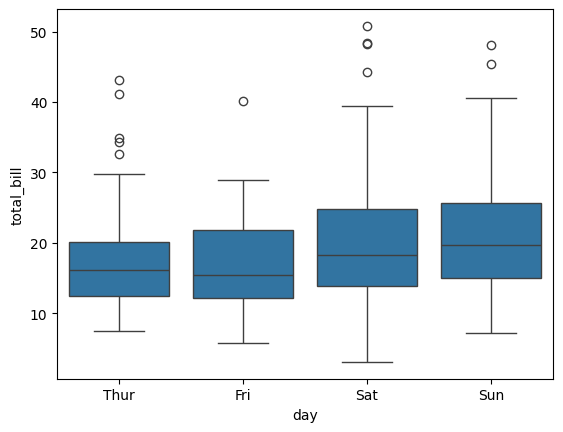

In [49]:

sns.boxplot(data=tips,x='day',y='total_bill')


<Axes: xlabel='day', ylabel='total_bill'>

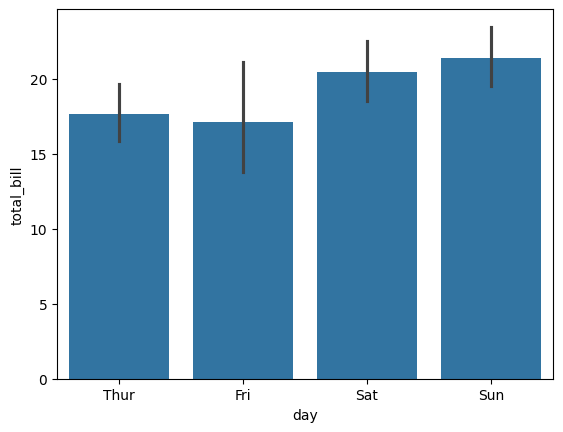

In [50]:

sns.barplot(data=tips,x='day',y='total_bill')



<Axes: xlabel='day', ylabel='total_bill'>

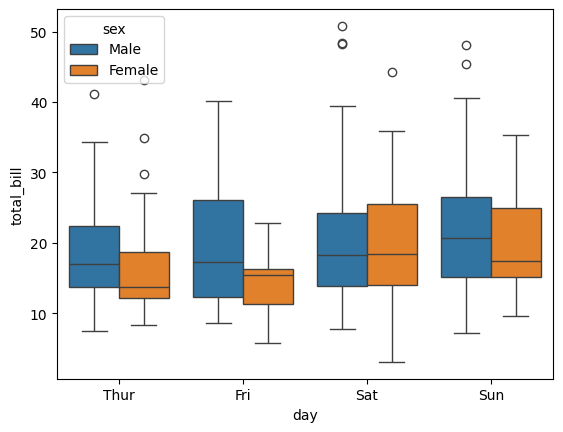

In [51]:

sns.boxplot(data=tips,x='day',y='total_bill',hue='sex')


<Axes: xlabel='total_bill', ylabel='tip'>

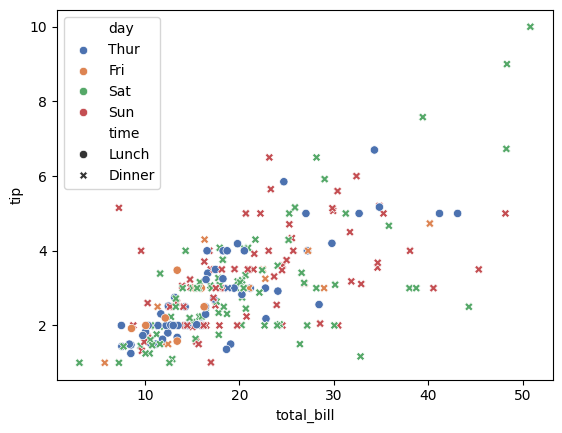

In [52]:

sns.scatterplot(data=tips,x='total_bill',y='tip',hue='day',style='time',palette='deep')


<Axes: xlabel='size', ylabel='tip'>

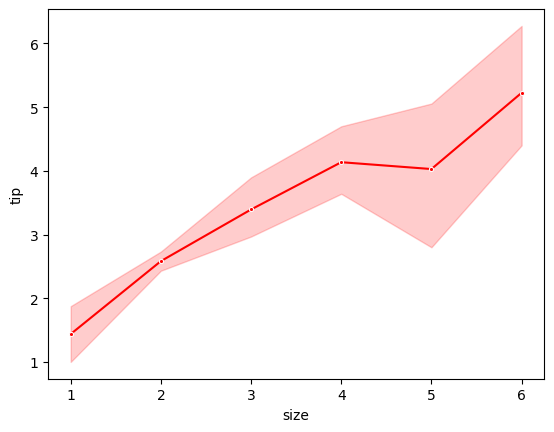

In [53]:

sns.lineplot(data=tips,x='size',y='tip',marker='.',color='red')


In [54]:

tips['sex'] = tips['sex'].map({'Female':0,'Male':1})


In [55]:

tips['smoker'] = tips['smoker'].map({'No':0,'Yes':1})

tips['time'] = tips['time'].map({'Dinner':0,'Lunch':1})
tips['day'] = tips['day'].map({'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6})



<Figure size 1500x1000 with 0 Axes>

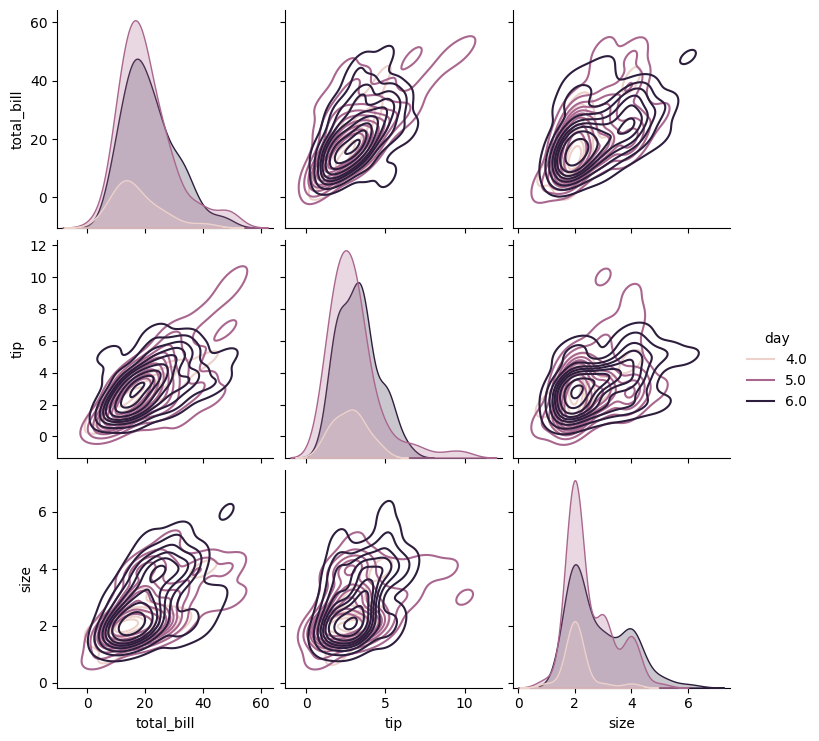

In [56]:

correlation = tips.corr()
plt.figure(figsize=(15,10))
sns.pairplot(tips,kind='kde',hue='day')


<Axes: >

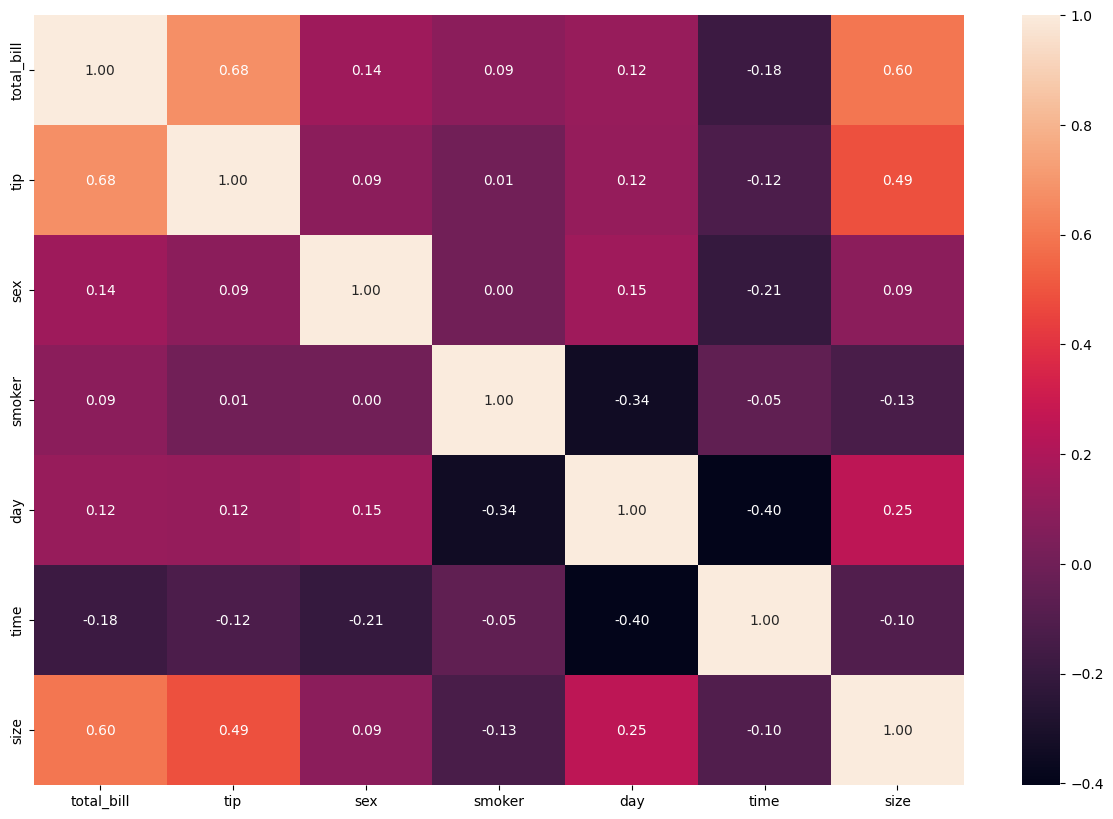

In [57]:

plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True,fmt='.2f')
